In [69]:
import numpy as np
import matplotlib.pyplot as plt
# from pint import UnitRegistry
# ur = UnitRegistry()

G = 6.67e-11 #* ur.meter**2 * ur.newton / ur.kilogram**2
re_real = 6371e3
re = 2 * re_real
me = 5.972e24 #* ur.kilogram



(196364, 3)


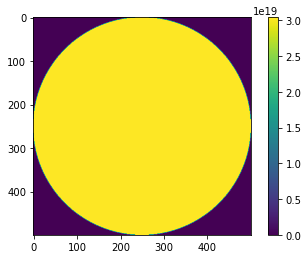

In [66]:
grid_size = np.array((500,500))

grid = np.ones(grid_size)

ms = []

for i, row in enumerate(grid):
    for j, p in enumerate(row):
        pos = (i,j) - (grid_size - 1) / 2
        if np.linalg.norm(pos) > grid_size[0]/2:
            grid[i,j] = 0
        else:
            ms.append((pos[0], pos[1], 0))

dm = me / len(ms)
grid *= dm
ms = np.array(ms) / (grid_size[0] / 2) * re
print(ms.shape)
plt.imshow(grid)
plt.colorbar()
plt.show()

In [93]:
def unit(v):
    return v / np.linalg.norm(v)

def calc_grav(pos, m1, m2, ms):
    rs = ms - pos
    rmags = np.linalg.norm(rs, axis=1)
    Fmags = m1 * m2 * G / (rmags**2)
    
    unit_rs = rs / np.expand_dims(rmags, 1)

    return np.matmul(unit_rs.T, Fmags)

calc_grav(np.array([0,0,re]), 1, dm, ms)


array([-3.94129174e-15, -1.15823167e-18, -1.43713345e+00])

In [25]:
np.linalg.norm(np.array([[1,2,3], [4,5,6]]), axis=1)

array([3.74165739, 8.77496439])

In [23]:
np.array([[1,2,3], [4,5,6]]).shape

(2, 3)

In [70]:
dm * len(ms) - me

0.0

In [48]:
re

12745.329064000001

In [94]:
G * me * 1 / (re)**2

2.4534116968415662

In [88]:
a = np.array([1,2,3,4,5,6])
print(a.shape)

a = np.expand_dims(a,0)
print(a.shape)

(6,)
(1, 6)
